In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('happiness_score_dataset.csv')
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


the features are country, region, happiness rank, happiness score,standard error, economy, family, health, freedom, trust and generosity

label is dystopia residual

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.shape

(158, 12)

There are 12 columns and 158 rows

There are no null values in any column

2 features are string and 10 are number

# changing column names

In [6]:
df.rename(columns={ "Economy (GDP per Capita)": "GDP",
                         "Family":"Social Security",
                         "Health (Life Expectancy)": "Life Expectancy", 
                         "Trust (Government Corruption)":"absence of corruption" }, inplace = True)

In [7]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Social Security,Life Expectancy,Freedom,absence of corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,GDP,Social Security,Life Expectancy,Freedom,absence of corruption,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


a.No null values

b.outliers are present as there is different between mean and median(i.e. 50%)

In [9]:
#checking missing value
df.isnull().sum()

Country                  0
Region                   0
Happiness Rank           0
Happiness Score          0
Standard Error           0
GDP                      0
Social Security          0
Life Expectancy          0
Freedom                  0
absence of corruption    0
Generosity               0
Dystopia Residual        0
dtype: int64

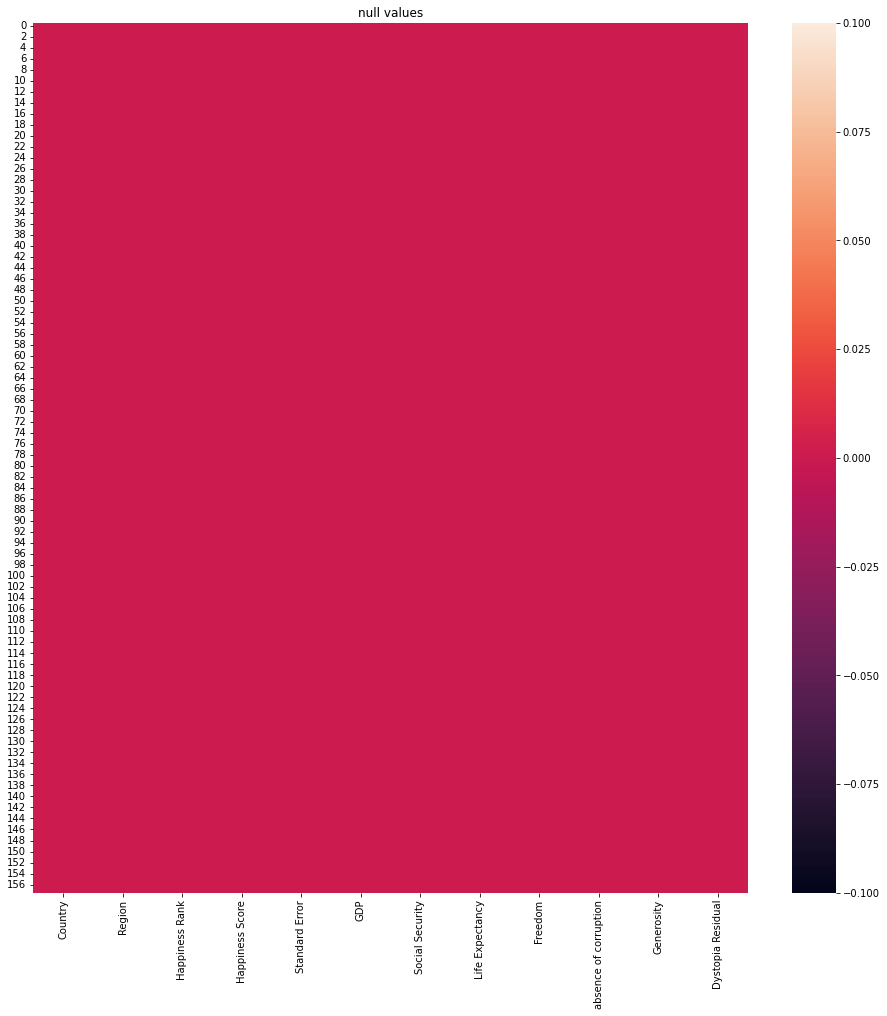

In [10]:
#checking null value is present or not through heat map
plt.figure(figsize=[16,16])
sns.heatmap(df.isnull(),y)
plt.title("null values")
plt.show()

since no white line is there, no missing value

# factors affecting happiness

economic production, social support, life
expectancy, freedom, absence of corruption, and generosity

In [11]:
#dropping columns not needed
data=df.drop(columns=['Country','Region','Happiness Rank','Happiness Score','Standard Error'])
data.head()

,GDP,Social Security,Life Expectancy,Freedom,absence of corruption,Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [12]:
x=data[['GDP','Social Security','Life Expectancy','Freedom','absence of corruption','Generosity']]  #feature
y=data['Dystopia Residual']     #label

In [13]:
x

,GDP,Social Security,Life Expectancy,Freedom,absence of corruption,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
6,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
7,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
8,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562


In [14]:
y

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
5      2.61955
6      2.46570
7      2.37119
8      2.26425
9      2.26646
10     3.08854
11     3.17728
12     2.53320
13     3.60214
14     2.51011
15     3.26001
16     1.96961
17     1.97570
18     2.41484
19     2.24743
20     1.96994
21     2.47489
22     3.19131
23     1.88501
24     2.84848
25     2.11569
26     2.67585
27     1.55674
28     2.21126
29     2.83600
30     2.67782
31     2.32142
32     2.85737
33     2.31945
34     2.43872
35     2.12367
36     1.64880
37     2.32323
38     1.87634
39     2.79094
40     2.26882
41     3.03500
42     2.74255
43     2.23741
44     2.24639
45     1.68435
46     2.21978
47     2.53942
48     1.73797
49     2.02518
50     2.82334
51     3.10712
52     2.18896
53     2.24729
54     1.61583
55     2.44649
56     2.32407
57     2.59450
58     2.13090
59     1.86565
60     1.88541
61     2.75414
62     2.09066
63     2.27394
64     2.32038
65     1.59888
66     1.8

# Finding correlation between features using heatmap

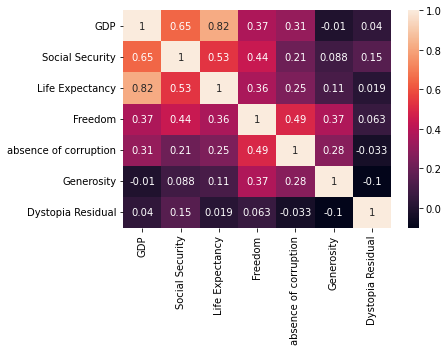

In [15]:
data_corr=data.corr()
sns.heatmap(data_corr, annot = True)
plt.show()

# Plotting relationship between label and features

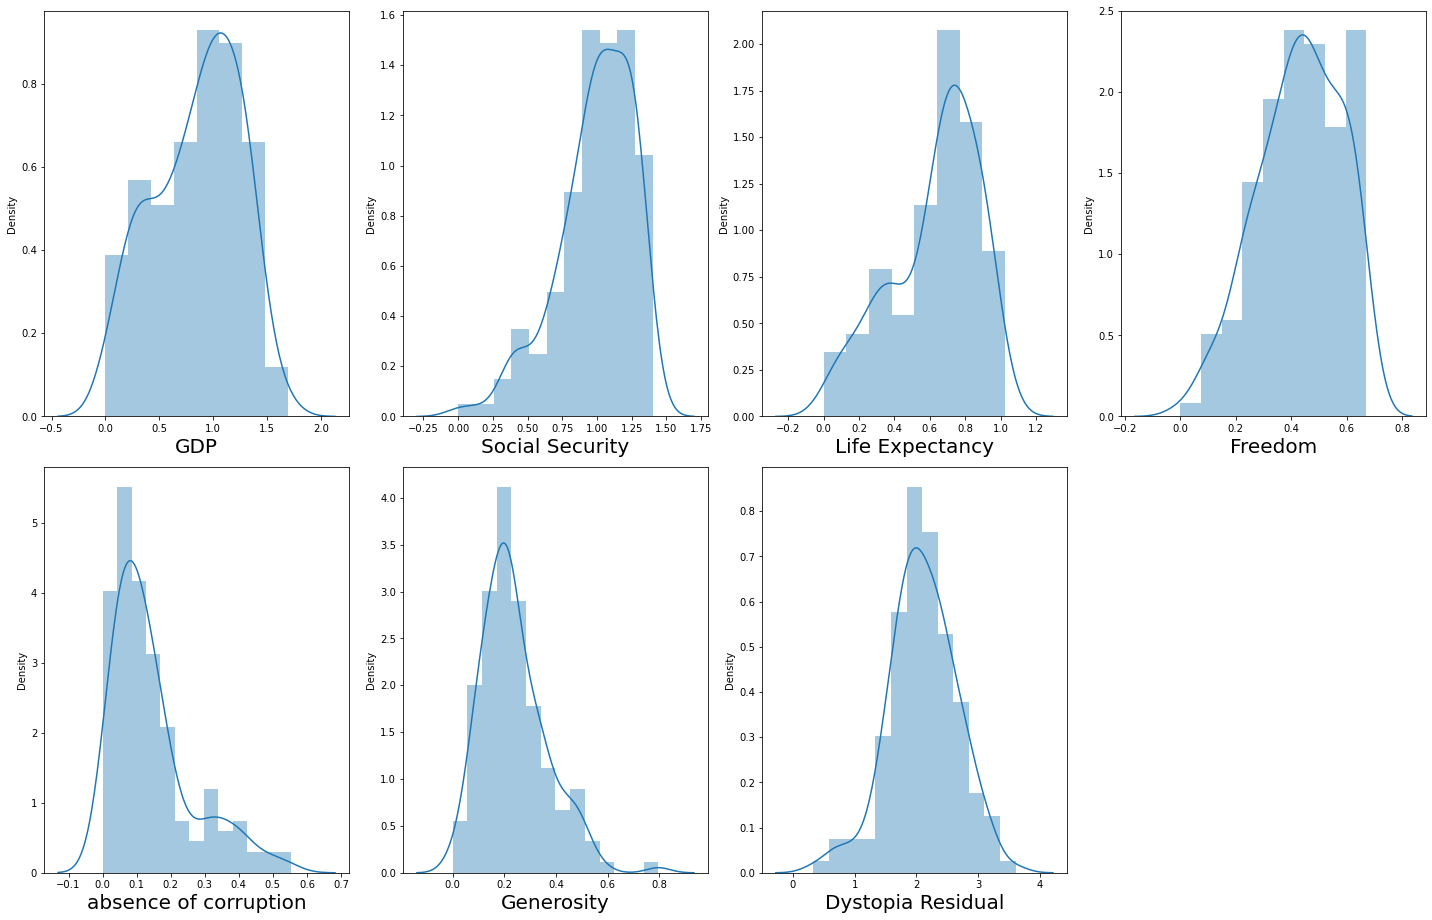

In [16]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(data[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

Outliers are present

# pairwise comparison

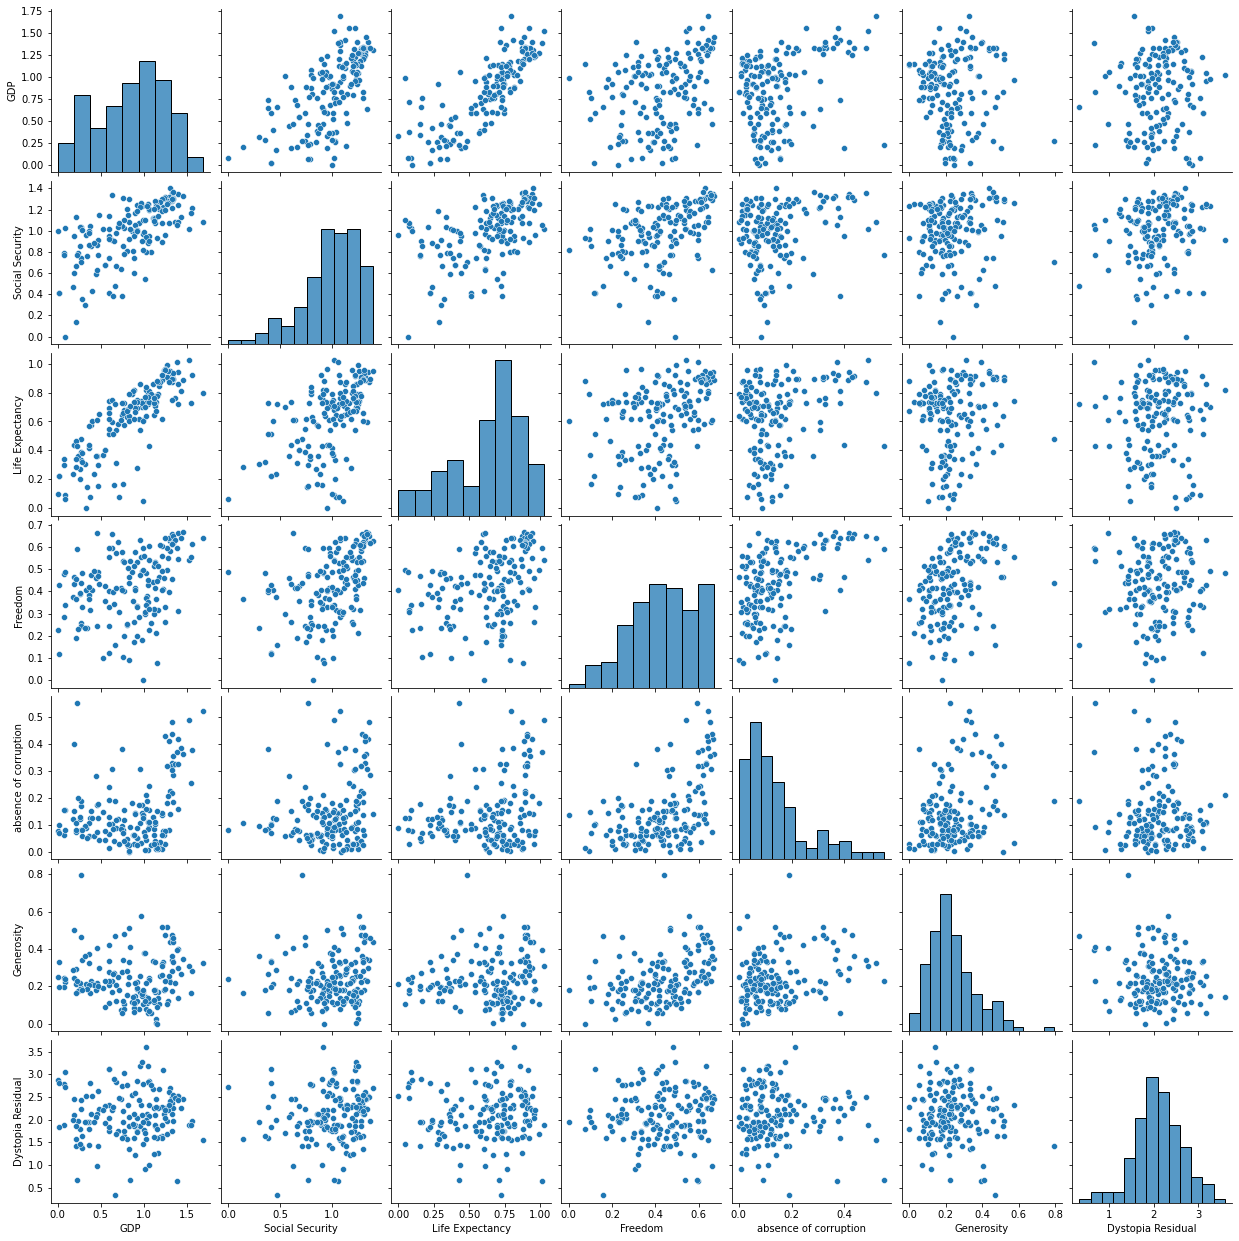

In [17]:
sns.pairplot(data)
plt.show()

# Dealing with outliers

In [18]:
x.skew()

GDP                     -0.317575
Social Security         -1.006893
Life Expectancy         -0.705328
Freedom                 -0.413462
absence of corruption    1.385463
Generosity               1.001961
dtype: float64

since negative values are there we wont use boxplot

In [19]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

df_new.skew()

GDP                     -0.127233
Social Security         -0.169651
Life Expectancy         -0.183181
Freedom                 -0.080728
absence of corruption    0.185965
Generosity               0.013320
dtype: float64

In [20]:
#reduced the skewness through log
df_new_log_Economy=np.log(df_new)
df_new_log_Economy.skew()

GDP                     -1.325252
Social Security         -2.389497
Life Expectancy         -1.558943
Freedom                 -2.640080
absence of corruption   -0.722867
Generosity              -1.682301
dtype: float64

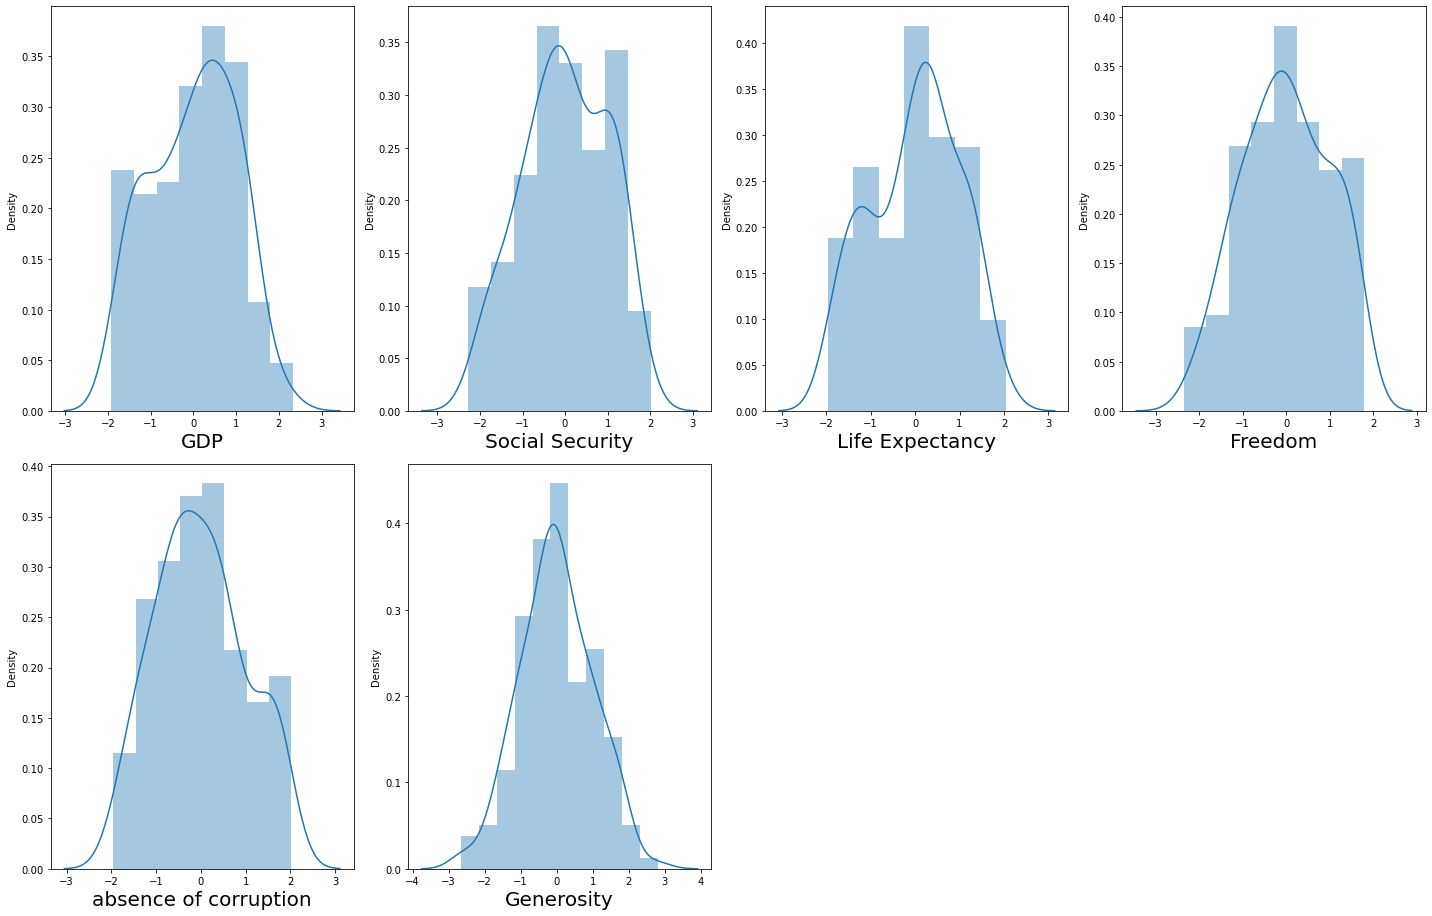

In [21]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_new:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(df_new[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [22]:
x=df_new[['GDP','Social Security','Life Expectancy','Freedom','absence of corruption','Generosity']]  #feature
y=df['Dystopia Residual']     #label



# Visualising scatter plot

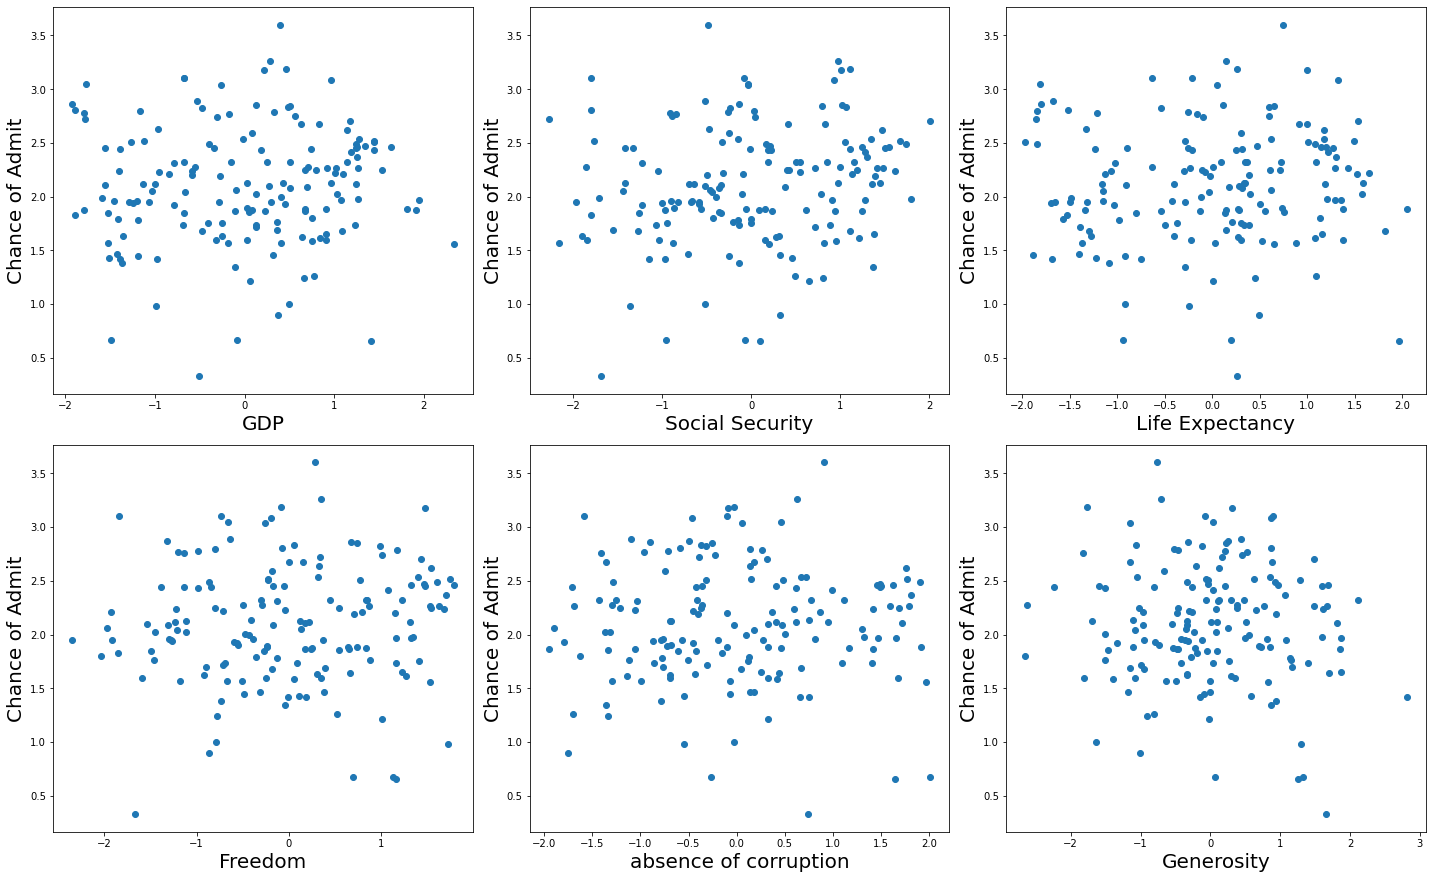

In [23]:
#visualising the relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [24]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(x)      #fit_transform()-->fit will call it formally and it will try to adjust our data into the formula,
                                      #tranform-->will make it scalar

x_scaled

array([[ 1.44606101e+00,  1.66920633e+00,  1.49176450e+00,
         1.75633466e+00,  1.77399061e+00,  6.22390513e-01],
       [ 1.17332111e+00,  2.01213244e+00,  1.53234847e+00,
         1.43994643e+00,  3.15993256e-01,  1.48099498e+00],
       [ 1.23983557e+00,  1.73958573e+00,  1.08522306e+00,
         1.61573320e+00,  1.90679207e+00,  9.27972764e-01],
       [ 1.63024551e+00,  1.55311811e+00,  1.14759962e+00,
         1.79282102e+00,  1.62400701e+00,  9.64080261e-01],
       [ 1.24216835e+00,  1.50172605e+00,  1.27017856e+00,
         1.47547945e+00,  1.50348412e+00,  1.59222419e+00],
       [ 1.13879938e+00,  1.47510960e+00,  1.17079907e+00,
         1.54972572e+00,  1.75923250e+00,  1.27130119e-01],
       [ 1.25124447e+00,  1.24751108e+00,  1.19308059e+00,
         1.33081553e+00,  1.45991648e+00,  1.68007190e+00],
       [ 1.25778915e+00,  1.29981977e+00,  1.30207755e+00,
         1.70597065e+00,  1.81691406e+00,  1.06237761e+00],
       [ 1.02489910e+00,  1.48372286e+00,  1.286

In [25]:
#splitting the data into train and test
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [26]:
y_train.head()

72     1.58782
156    1.83302
131    0.67108
60     1.88541
151    1.46494
Name: Dystopia Residual, dtype: float64

In [27]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [28]:
print(regression.predict(scaler.transform([[1.32629,1.32261,0.90563,0.63297,0.32957,0.45811]])))

[2.16190467]


 expected value was 2.61 but output we got is 2.16

# Saving of model 

In [29]:
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))


In [30]:
#prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[1.32629,1.32261,0.90563,0.63297,0.32957,0.45811]]))

#  Adjusted R2

In [31]:
regression.score(x_train,y_train)

0.0840755210664601

In [32]:
y_pred=regression.predict(x_test)

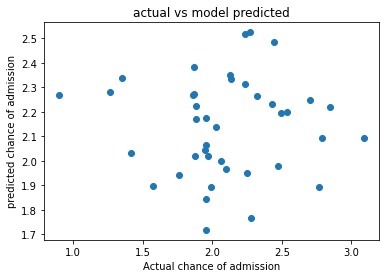

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

# Model evaluation

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [35]:
y_predict=regression.predict(x_test)

In [36]:
mean_absolute_error(y_test,y_pred)

0.3690763436667363

In [37]:
mean_squared_error(y_test,y_pred)

0.23330428035765313

In [38]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.4830158179166114

# Regularisation

In [39]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# using lasso cv

In [40]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [41]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

0.0010696700122955751

In [42]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0010696700122955751)

In [43]:
lasso_reg.score(x_test,y_test)

-0.1969046449898142

# Using RIDGE REGRESSION MODEL

In [44]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [45]:
ridgecv.alpha_

0.09099999999999998

In [46]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [47]:
ridge_model.score(x_test,y_test)

-0.20632101721395046